### Monte Carlo Sampling

#### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
from itertools import permutations
from collections import defaultdict
from random import shuffle
from fractions import Fraction
from time import perf_counter
import matplotlib.pyplot as plt
%matplotlib inline

#### Calculating Shapley Values

This script defines a function game that returns the sum of a list of players. It then generates num_samples random subsets of the players, calculates the marginal contribution of each player in each subset, and averages these contributions to estimate the player's Shapley value. Ihave assumed that the players are numbered and their fare corresponds to their numbers. Therefore, we have satisfied the requirements of the game.

#### 50 Players:

In [2]:
"""Find the shapely value for members of a colation, either exactly or with a monte-carlo approximation."""
# The shapely value for each player is the marginal value added by the player for joining the coalition,
# averaged over all possible permutaions of players joining. Since the number of permutations is the
# factorial of the number of players, unless the number of players is small we will have to settle for an approximate
# solution based on a random subset

def exact(players, fun):
    """
    Find the exact shapely values. Players is an iterable, fun is a function that takes a tuple
    of players as its parameter and returns a dict of values for that permutation.
    """
    values = {}
    count = 0
    for perm in permutations(players):
        val = fun(perm)
        count += 1
        for player in val:
            if player in values:
                values[player] += val[player]
            else:
                values[player] = val[player]
    for player in players:
        values[player] /= count
    return values

def exact_fraction(players, fun):
    """
    Same as exact, except it retruns values as fractions rather than floats.
    The value function should always return integer values for this to be even remotely useful.
    """
    values = defaultdict(int)
    count = 0
    for perm in permutations(players):
        val = fun(perm)
        count += 1
        for player in val:
            values[player] += val[player]
    for player in players:
        values[player] = Fraction(values[player], count)
    return dict(values)


def monte_carlo(players, fun, num):
    """
    Find the monte carlo approximation using n tries. 
    """
    values = {}
    count = 0
    perm = list(players)
    for ii in range(num):
        shuffle(perm)
        val = fun(perm)
        count += 1
        for player in val:
            if player in values:
                values[player] += val[player]
            else:
                values[player] = val[player]
    for player in players:
        values[player] /= count     
    return values

def rideshare_vals(perm):
    """
    Function that takes a tuple of players as its parameter and returns a dict of values for that permutation.
    """
    sofar = 0
    vals = {}
    for player in perm:
        if player > sofar:
            vals[player] = player - sofar
            sofar = player
        else:
            vals[player] = 0
    return vals

def player_list(num):
    """
    Generates a player list based on the number of players
    """
    lst = [i for i in range(1, num+1)]
    return lst
        

#### 4 Players:

In [3]:
n = 4

Exact value and fraction:

In [4]:
print(exact(player_list(n), rideshare_vals))

{1: 0.25, 2: 0.5833333333333334, 3: 1.0833333333333333, 4: 2.0833333333333335}


In [5]:
print(exact_fraction(player_list(n), rideshare_vals))

{1: Fraction(1, 4), 2: Fraction(7, 12), 3: Fraction(13, 12), 4: Fraction(25, 12)}


Monte Carlo Approximation:

In [6]:
N = 1000

In [7]:
print(monte_carlo(player_list(n), rideshare_vals, N))

{1: 0.238, 4: 2.069, 3: 1.12, 2: 0.573}


In [8]:
N = 10000

In [9]:
print(monte_carlo(player_list(n), rideshare_vals, N))

{2: 0.5838, 3: 1.0856, 4: 2.078, 1: 0.2526}


In [10]:
N = 100000

In [11]:
print(monte_carlo(player_list(n), rideshare_vals, N))

{2: 0.58142, 4: 2.08175, 3: 1.08696, 1: 0.24987}


We see as the number of iterations increase so does the accuracy of our estimate.

#### 50 Players:

In [12]:
n = 5

Exact value and time taken:

In [13]:
t1 = perf_counter()
print(exact(player_list(n), rideshare_vals))
t2 = perf_counter()
print('Time Taken: {}s'.format(round(t2-t1, 5)))

{1: 0.2, 2: 0.45, 3: 0.7833333333333333, 4: 1.2833333333333334, 5: 2.283333333333333}
Time Taken: 0.00338s


In [14]:
print(exact_fraction(player_list(n), rideshare_vals))

{1: Fraction(1, 5), 2: Fraction(9, 20), 3: Fraction(47, 60), 4: Fraction(77, 60), 5: Fraction(137, 60)}


In [15]:
n = 10

Exact value and time taken:

In [16]:
t1 = perf_counter()
print(exact(player_list(n), rideshare_vals))
t2 = perf_counter()
print('Time Taken: {}s'.format(round(t2-t1, 5)))

{1: 0.1, 2: 0.2111111111111111, 3: 0.33611111111111114, 4: 0.478968253968254, 5: 0.6456349206349207, 6: 0.8456349206349206, 7: 1.0956349206349207, 8: 1.428968253968254, 9: 1.928968253968254, 10: 2.9289682539682538}
Time Taken: 35.98737s


In [17]:
n = 11

Exact value and time taken:

In [18]:
t1 = perf_counter()
print(exact(player_list(n), rideshare_vals))
t2 = perf_counter()
print('Time Taken: {}s'.format(round(t2-t1, 5)))

{1: 0.09090909090909091, 2: 0.19090909090909092, 3: 0.302020202020202, 4: 0.427020202020202, 5: 0.5698773448773449, 6: 0.7365440115440115, 7: 0.9365440115440116, 8: 1.1865440115440116, 9: 1.5198773448773448, 10: 2.019877344877345, 11: 3.019877344877345}
Time Taken: 467.50591s


We see an exponential increase in computation time. So we must compute an estimate like the Monte Carlo method.

In [19]:
n = 50
N = 1000000

In [20]:
for key, value in sorted(monte_carlo(player_list(n), rideshare_vals, N).items()):
    print('Player {}: {}'.format(key, value))

Player 1: 0.019914
Player 2: 0.040123
Player 3: 0.06149
Player 4: 0.082719
Player 5: 0.10361
Player 6: 0.127212
Player 7: 0.147943
Player 8: 0.171315
Player 9: 0.196939
Player 10: 0.221049
Player 11: 0.243994
Player 12: 0.267959
Player 13: 0.296853
Player 14: 0.322588
Player 15: 0.353767
Player 16: 0.37956
Player 17: 0.41116
Player 18: 0.441213
Player 19: 0.476417
Player 20: 0.510022
Player 21: 0.537051
Player 22: 0.572387
Player 23: 0.602718
Player 24: 0.644528
Player 25: 0.687399
Player 26: 0.726086
Player 27: 0.765489
Player 28: 0.809488
Player 29: 0.852572
Player 30: 0.90161
Player 31: 0.949315
Player 32: 1.006317
Player 33: 1.061851
Player 34: 1.119388
Player 35: 1.182289
Player 36: 1.243772
Player 37: 1.328159
Player 38: 1.388127
Player 39: 1.478346
Player 40: 1.564934
Player 41: 1.671618
Player 42: 1.778165
Player 43: 1.916369
Player 44: 2.047775
Player 45: 2.201853
Player 46: 2.419449
Player 47: 2.66584
Player 48: 2.996596
Player 49: 3.497949
Player 50: 4.506713


We know that the contribution of the first player should be $\frac{1}{n}$ which is pretty close to our estimate.

In [21]:
df1 = pd.DataFrame()
n = 50
iterations = 20
for i in range(0,iterations):
    for N in [100, 1000, 10000, 100000, 1000000]:
        t1 = perf_counter()
        estimate_dict = monte_carlo(player_list(n), rideshare_vals, N)
        t2 = perf_counter()
        if i>0:
            df1.loc[f'{N} Iterations', 'Error Percent'] += abs((1-estimate_dict[1]/0.02))*100
            df1.loc[f'{N} Iterations', 'Runtime (s)'] += round(t2-t1, 3)
        else:
            df1.loc[f'{N} Iterations', 'Error Percent'] = abs((1-estimate_dict[1]/0.02))*100
            df1.loc[f'{N} Iterations', 'Runtime (s)'] = round(t2-t1, 3)
df1 = df1/iterations
df1

,Error Percent,Runtime (s)
100 Iterations,65.0000,0.01295
1000 Iterations,20.7500,0.13525
10000 Iterations,5.8750,1.34615
100000 Iterations,1.2700,13.46360
1000000 Iterations,0.6045,135.06720


Text(0.5, 1.0, 'Monte Carlo Sampling Error averaged over 20 runs (50 Players)')

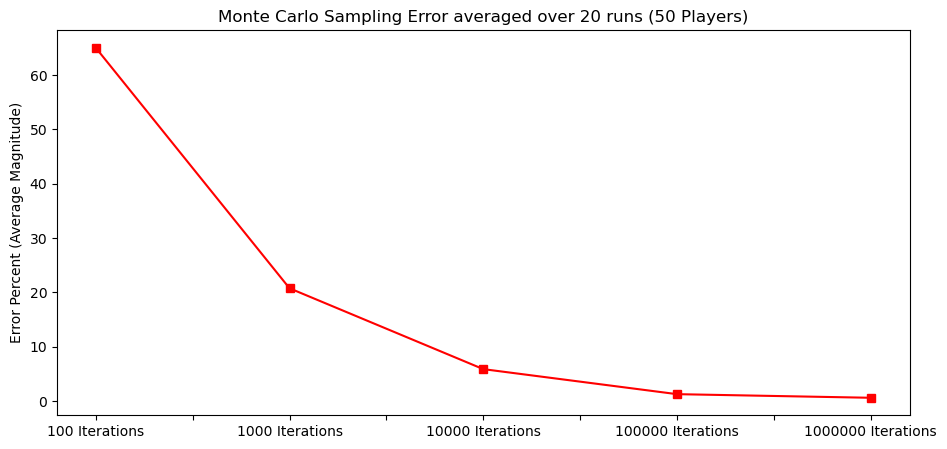

In [22]:
df1['Error Percent'].plot(figsize=(11,5),marker='s',color='r', linestyle='solid')
plt.ylabel("Error Percent (Average Magnitude)")
plt.title("Monte Carlo Sampling Error averaged over 20 runs (50 Players)")

Text(0.5, 1.0, 'Monte Carlo Sampling Runtime averaged over 20 runs (50 Players)')

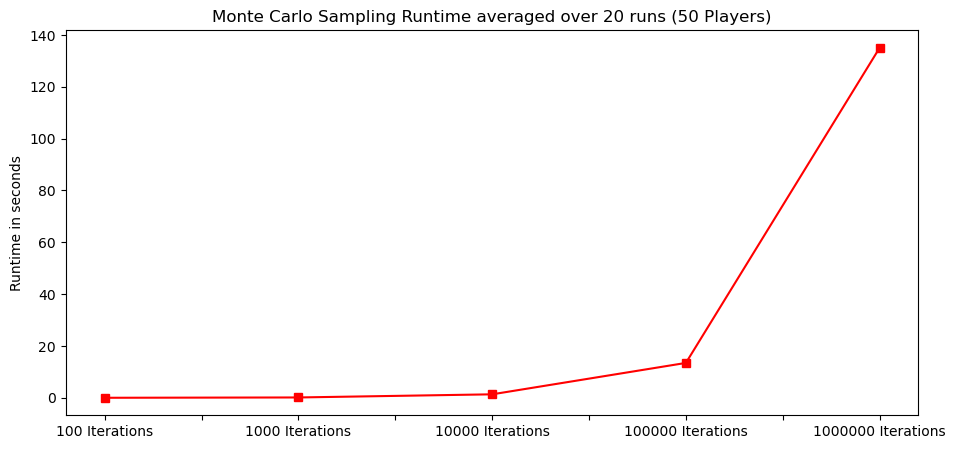

In [23]:
df1['Runtime (s)'].plot(figsize=(11,5),marker='s',color='r', linestyle='solid')
plt.ylabel("Runtime in seconds")
plt.title("Monte Carlo Sampling Runtime averaged over 20 runs (50 Players)")

#### 100 Players:

In [24]:
n = 100
N = 1000000

In [25]:
for key, value in sorted(monte_carlo(player_list(n), rideshare_vals, N).items()):
    print('Player {}: {}'.format(key, value))

Player 1: 0.010189
Player 2: 0.020146
Player 3: 0.030342
Player 4: 0.040521
Player 5: 0.052039
Player 6: 0.061478
Player 7: 0.072776
Player 8: 0.082866
Player 9: 0.093675
Player 10: 0.106397
Player 11: 0.115598
Player 12: 0.125658
Player 13: 0.138711
Player 14: 0.147513
Player 15: 0.161754
Player 16: 0.174382
Player 17: 0.183124
Player 18: 0.197692
Player 19: 0.209874
Player 20: 0.221576
Player 21: 0.237408
Player 22: 0.250102
Player 23: 0.258654
Player 24: 0.268773
Player 25: 0.285554
Player 26: 0.297126
Player 27: 0.313049
Player 28: 0.3282
Player 29: 0.342047
Player 30: 0.35745
Player 31: 0.372932
Player 32: 0.384663
Player 33: 0.400107
Player 34: 0.409154
Player 35: 0.431697
Player 36: 0.450625
Player 37: 0.460435
Player 38: 0.478731
Player 39: 0.489748
Player 40: 0.506462
Player 41: 0.522002
Player 42: 0.547729
Player 43: 0.556861
Player 44: 0.575458
Player 45: 0.591625
Player 46: 0.614636
Player 47: 0.63016
Player 48: 0.65634
Player 49: 0.662616
Player 50: 0.691633
Player 51: 0.7

In [26]:
N = 1000000
df2 = pd.DataFrame()
for n in range(10, 101, 10):
    t1 = perf_counter()
    estimate_dict = monte_carlo(player_list(n), rideshare_vals, N)
    t2 = perf_counter()
    df2.loc[f'{n} Players', 'Runtime (s)'] = round(t2-t1, 3)
df2

,Runtime (s)
10 Players,31.042
20 Players,56.244
30 Players,81.895
40 Players,108.960
50 Players,133.346
60 Players,160.716
70 Players,186.664
80 Players,209.880
90 Players,242.966
100 Players,266.652


Text(0.5, 1.0, 'Monte Carlo Sampling Algorithm Runtime')

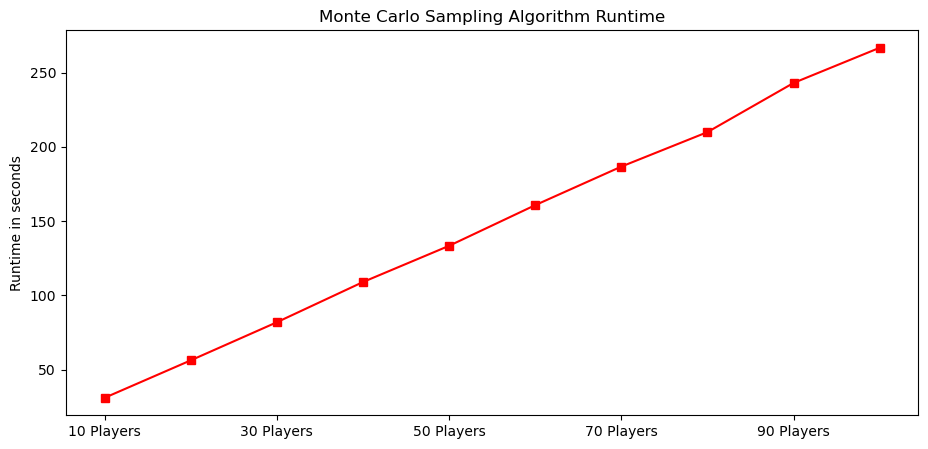

In [27]:
df2['Runtime (s)'].plot(figsize=(11,5),marker='s',color='r', linestyle='solid')
plt.ylabel("Runtime in seconds")
plt.title("Monte Carlo Sampling Algorithm Runtime")